In [1778]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#Read the dataset
df = pd.read_csv('train_dataset_final1.csv')
df.head()

,Customer_ID,marriage,sex,education,LIMIT_BAL,age,pay_0,pay_2,pay_3,pay_4,...,Bill_amt6,pay_amt1,pay_amt2,pay_amt3,pay_amt4,pay_amt5,pay_amt6,AVG_Bill_amt,PAY_TO_BILL_ratio,next_month_default
0,5017,2,0,2,60000,25.0,2,2,2,0,...,20750.63,2000.21,0.00,1134.85,1821.78,1500.03,1500.24,41511.50,0.03,0
1,5018,2,1,1,290000,24.0,0,0,-2,-2,...,1350.30,0.00,0.17,0.00,2700.10,0.00,1349.72,2534.50,0.27,0
2,5019,1,0,2,180000,63.0,0,0,0,0,...,52991.51,2086.94,2199.99,1845.66,2000.35,1923.00,1999.78,50422.00,0.04,0
3,5020,1,1,2,210000,43.0,0,0,0,0,...,76945.47,3348.07,3380.91,3400.45,2683.97,2744.00,2892.10,86229.50,0.04,0
4,5021,2,0,1,280000,32.0,-2,-2,-2,-2,...,1.35,999.78,3186.27,45027.78,2100.09,0.01,0.27,11814.33,0.72,0


In [1779]:
print(df.shape)
print(df.info())
print(df.describe())

(25247, 27)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25247 entries, 0 to 25246
Data columns (total 27 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Customer_ID         25247 non-null  int64  
 1   marriage            25247 non-null  int64  
 2   sex                 25247 non-null  int64  
 3   education           25247 non-null  int64  
 4   LIMIT_BAL           25247 non-null  int64  
 5   age                 25121 non-null  float64
 6   pay_0               25247 non-null  int64  
 7   pay_2               25247 non-null  int64  
 8   pay_3               25247 non-null  int64  
 9   pay_4               25247 non-null  int64  
 10  pay_5               25247 non-null  int64  
 11  pay_6               25247 non-null  int64  
 12  Bill_amt1           25247 non-null  float64
 13  Bill_amt2           25247 non-null  float64
 14  Bill_amt3           25247 non-null  float64
 15  Bill_amt4           25247 non-null  float

In [1780]:
# Missing values
print(df.isnull().sum())

#in age replace nulls with mean
df['age'].fillna(df['age'].mean(), inplace=True)

Customer_ID             0
marriage                0
sex                     0
education               0
LIMIT_BAL               0
age                   126
pay_0                   0
pay_2                   0
pay_3                   0
pay_4                   0
pay_5                   0
pay_6                   0
Bill_amt1               0
Bill_amt2               0
Bill_amt3               0
Bill_amt4               0
Bill_amt5               0
Bill_amt6               0
pay_amt1                0
pay_amt2                0
pay_amt3                0
pay_amt4                0
pay_amt5                0
pay_amt6                0
AVG_Bill_amt            0
PAY_TO_BILL_ratio       0
next_month_default      0
dtype: int64


C:\Users\krish\AppData\Local\Temp\ipykernel_146648\2820861234.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['age'].fillna(df['age'].mean(), inplace=True)


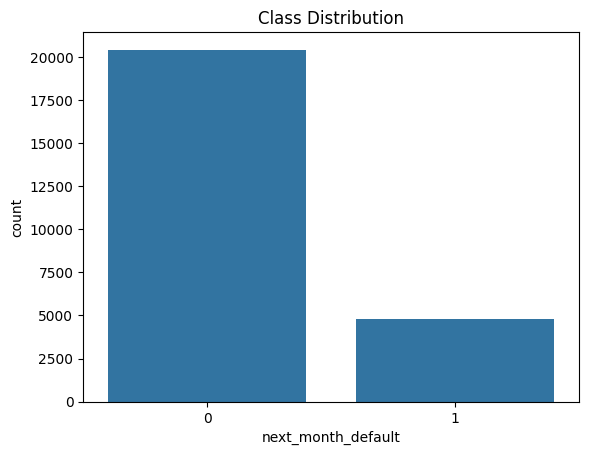

next_month_default
0    0.809601
1    0.190399
Name: proportion, dtype: float64


In [1781]:
# Target variable distribution
sns.countplot(x='next_month_default', data=df)
plt.title("Class Distribution")
plt.show()

print(df['next_month_default'].value_counts(normalize=True))

# -> 20% of users are likely to default next month

Total rows in the dataset: 25247


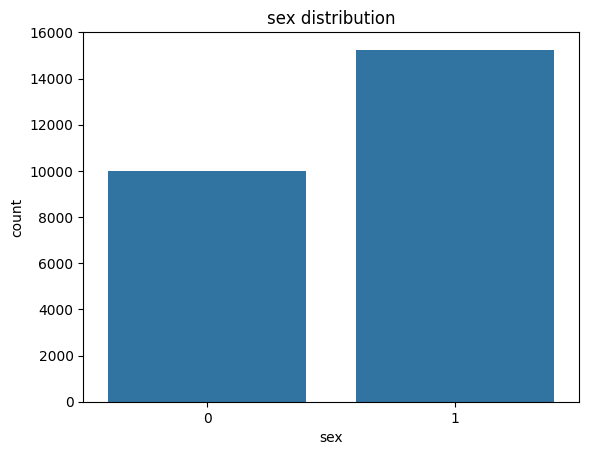

sex unique values: [0 1]
sex
1    60.411138
0    39.588862
Name: proportion, dtype: float64
sex
1    15252
0     9995
Name: count, dtype: int64


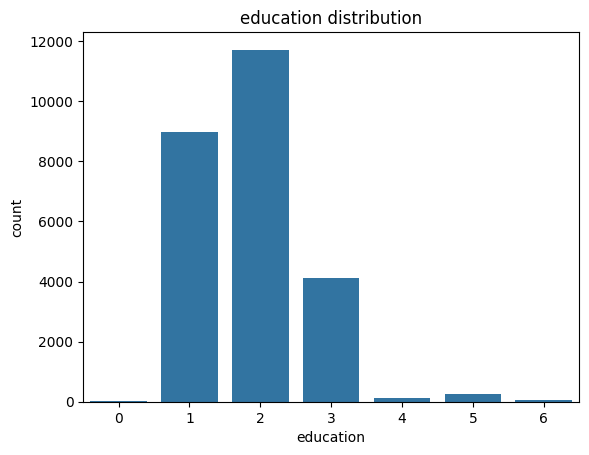

education unique values: [2 1 3 4 5 6 0]
education
2    46.409474
1    35.600269
3    16.298966
5     1.002099
4     0.459461
6     0.174278
0     0.055452
Name: proportion, dtype: float64
education
2    11717
1     8988
3     4115
5      253
4      116
6       44
0       14
Name: count, dtype: int64


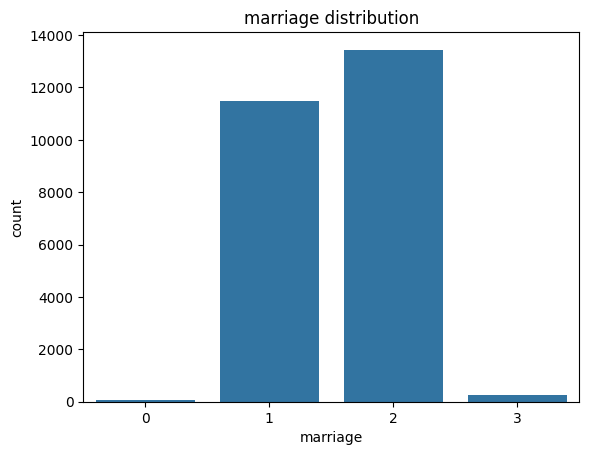

marriage unique values: [2 1 3 0]
marriage
2    53.238008
1    45.470749
3     1.081317
0     0.209926
Name: proportion, dtype: float64
marriage
2    13441
1    11480
3      273
0       53
Name: count, dtype: int64


In [1782]:
categorical_cols = ['sex', 'education', 'marriage']

#print total rows in the dataset
print("Total rows in the dataset:", len(df))

for col in categorical_cols:
    sns.countplot(x=col, data=df)
    plt.title(f'{col} distribution')
    plt.show()
    print(f"{col} unique values:", df[col].unique())
    print(df[col].value_counts(normalize=True) * 100)
    print(df[col].value_counts())

# 297 outliers for education
# 273 outliers for marriage
# Very less married people in the dataset -> only 53 out of 25247

#In marriage replace 3+ with median of 0,1,2
df['marriage'] = df['marriage'].replace(0, 3)

#In edu replace 3+ with median of 0,1,2
df['education'] = df['education'].replace(0, 4)
df['education'] = df['education'].replace(5, 4)
df['education'] = df['education'].replace(6, 4)


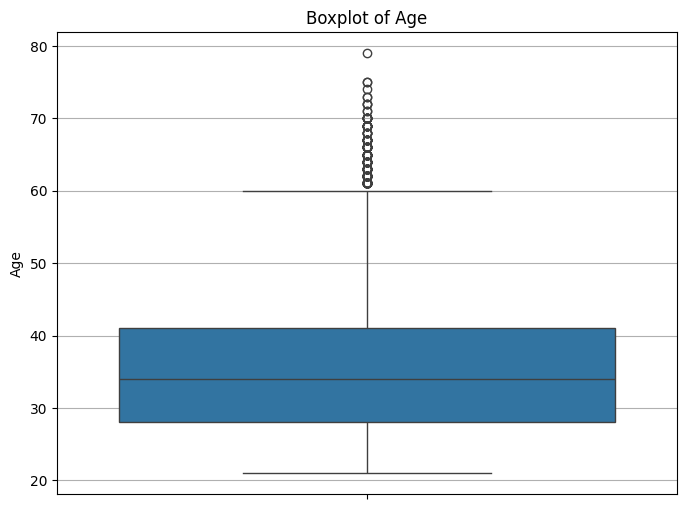

Number of outliers in age: 217
(25247, 27)
(25247, 27)


In [1783]:
# Boxplot for age
plt.figure(figsize=(8, 6))

sns.boxplot(y='age', data=df)
plt.title('Boxplot of Age')
plt.ylabel('Age')
plt.grid(axis='y')
plt.show()

# Number of outliers in age
Q1 = df['age'].quantile(0.25)
Q3 = df['age'].quantile(0.75)
IQR = Q3 - Q1
outliers = df[(df['age'] < (Q1 - 1.5 * IQR)) | (df['age'] > (Q3 + 1.5 * IQR))]
print(f'Number of outliers in age: {len(outliers)}')


# Capping the outliers to upper IQR bound
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
print(df.shape)
df['age'] = df['age'].clip(lower=lower_bound, upper=upper_bound)
print(df.shape)



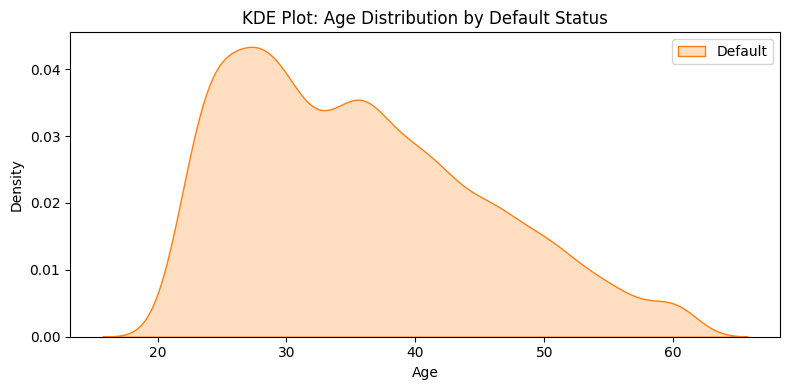

In [1784]:

# KDE plot: Age distributions split by default status
plt.figure(figsize=(8, 4))

sns.kdeplot(
    data=df[df['next_month_default'] == 1],
    x='age',
    label='Default',
    fill=True,
    color="#ff7f0e"
)
plt.title("KDE Plot: Age Distribution by Default Status")
plt.xlabel("Age")
plt.ylabel("Density")
plt.legend()
plt.tight_layout()
plt.show()

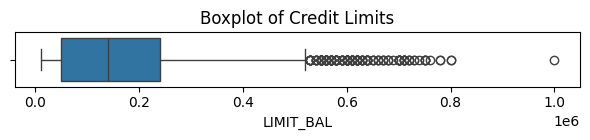

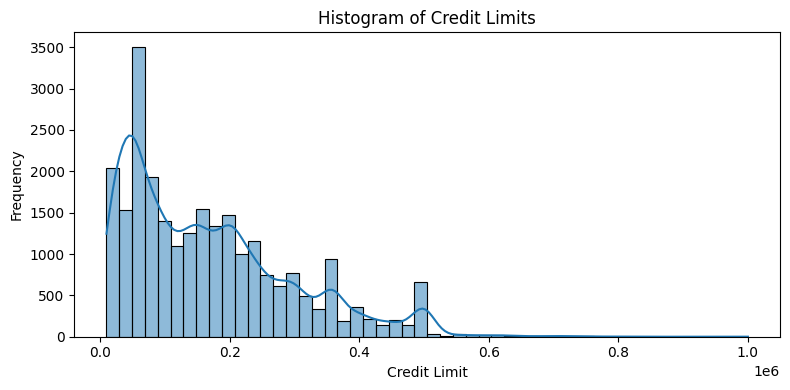

In [1785]:
# EDA for Limit Balance
# 2. Boxplot of Credit Limit
plt.figure(figsize=(6, 1.5))
sns.boxplot(x=df['LIMIT_BAL'])
plt.title("Boxplot of Credit Limits")
plt.tight_layout()
plt.show()

#also print histogram
plt.figure(figsize=(8, 4))
sns.histplot(df['LIMIT_BAL'], bins=50, kde=True)
plt.title("Histogram of Credit Limits")
plt.xlabel("Credit Limit")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()


In [1786]:
# number of outliers in LIMIT_BAL

Q1 = df['LIMIT_BAL'].quantile(0.25)
Q3 = df['LIMIT_BAL'].quantile(0.75)
IQR = Q3 - Q1

# Capping the outliers to upper IQR bound
lower_bound = max(Q1 - 1.5 * IQR,0)
upper_bound = Q3 + 1.5 * IQR

outliers = df[(df['LIMIT_BAL'] < lower_bound) | (df['LIMIT_BAL'] > upper_bound)]
print(f'Lower bound: {lower_bound}, Upper bound: {upper_bound}')
print(f'Number of outliers in LIMIT_BAL: {len(outliers)}')

print(df.shape)
df['LIMIT_BAL'] = df['LIMIT_BAL'].clip(lower=lower_bound, upper=upper_bound)
# Print dimensions after cleaning
print("Shape after capping LIMIT_BAL outliers:", df.shape)

Lower bound: 0, Upper bound: 525000.0
Number of outliers in LIMIT_BAL: 148
(25247, 27)
Shape after capping LIMIT_BAL outliers: (25247, 27)


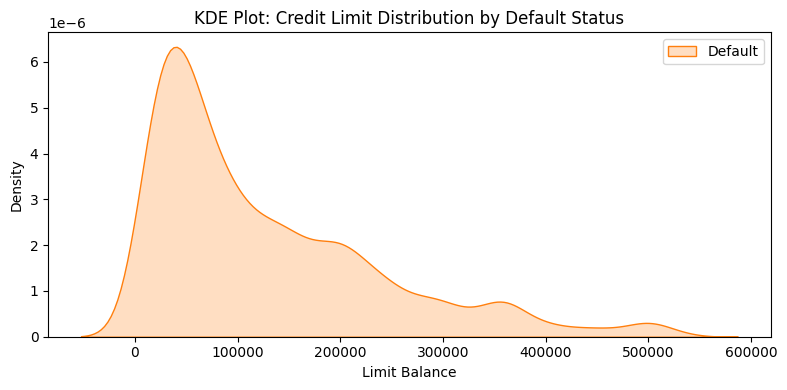

In [1787]:
# kde plot for Limit Balance with default status

plt.figure(figsize=(8, 4))
sns.kdeplot(
    data=df[df['next_month_default'] == 1],
    x='LIMIT_BAL',
    label='Default',
    fill=True,
    color="#ff7f0e"
)
plt.title("KDE Plot: Credit Limit Distribution by Default Status")
plt.xlabel("Limit Balance")
plt.ylabel("Density")
plt.legend()
plt.tight_layout()
plt.show()

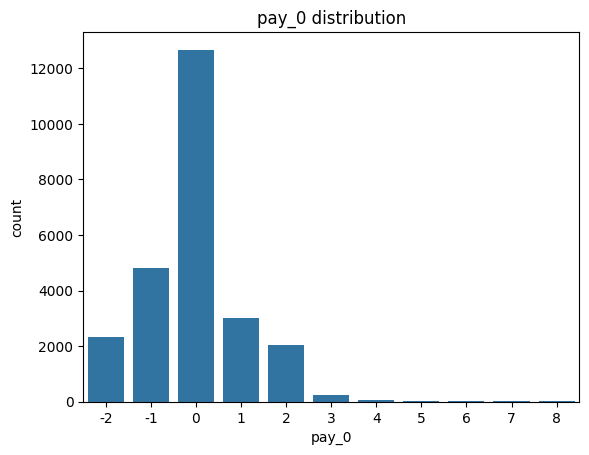

pay_0 unique values: [ 2  0 -2 -1  1  8  4  3  5  6  7]
pay_0 value counts:
 pay_0
 0    12667
-1     4821
 1     3030
-2     2331
 2     2047
 3      244
 4       56
 5       21
 8       14
 6        8
 7        8
Name: count, dtype: int64


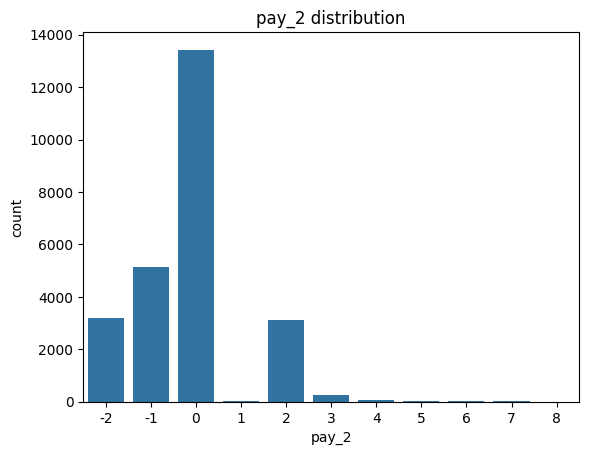

pay_2 unique values: [ 2  0 -2 -1  7  4  3  1  5  6  8]
pay_2 value counts:
 pay_2
 0    13424
-1     5128
-2     3210
 2     3098
 3      239
 4       77
 1       25
 5       19
 7       15
 6       11
 8        1
Name: count, dtype: int64


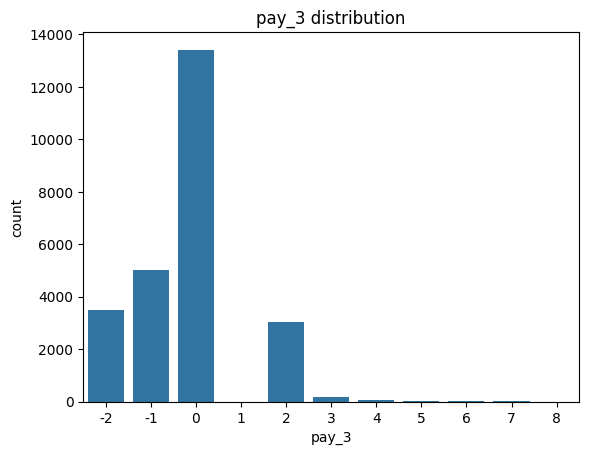

pay_3 unique values: [ 2 -2  0 -1  6  3  4  1  7  5  8]
pay_3 value counts:
 pay_3
 0    13415
-1     5019
-2     3480
 2     3039
 3      179
 4       57
 7       18
 5       18
 6       17
 1        4
 8        1
Name: count, dtype: int64


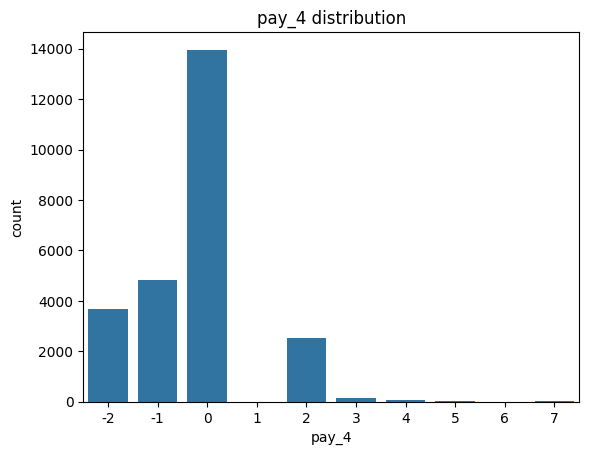

pay_4 unique values: [ 0 -2 -1  2  5  3  4  7  6  1]
pay_4 value counts:
 pay_4
 0    13961
-1     4816
-2     3694
 2     2509
 3      137
 4       52
 7       43
 5       29
 6        4
 1        2
Name: count, dtype: int64


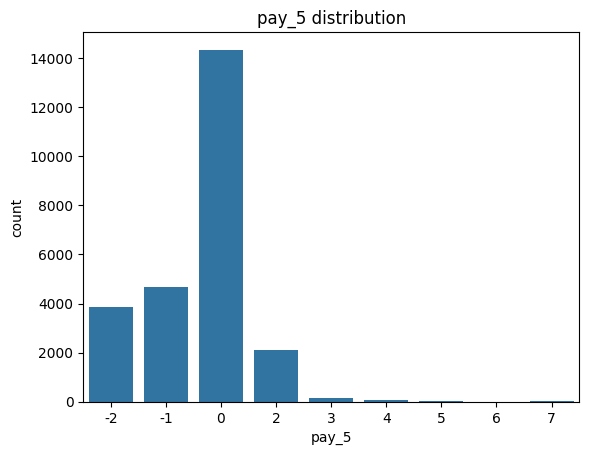

pay_5 unique values: [ 0 -1 -2  2  4  3  6  7  5]
pay_5 value counts:
 pay_5
 0    14345
-1     4680
-2     3859
 2     2100
 3      133
 4       72
 7       43
 5       14
 6        1
Name: count, dtype: int64


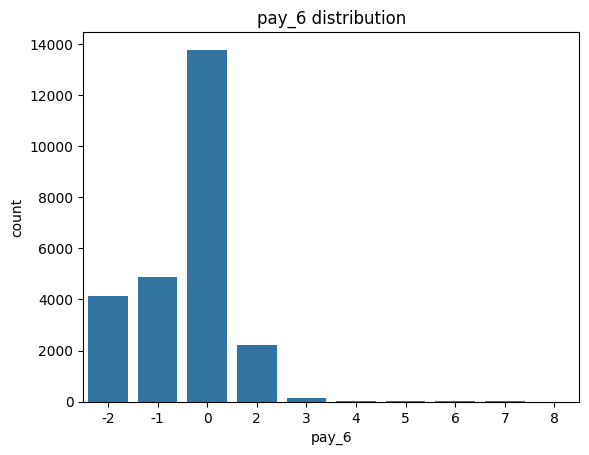

pay_6 unique values: [ 0 -2 -1  2  3  4  5  7  6  8]
pay_6 value counts:
 pay_6
 0    13769
-1     4882
-2     4139
 2     2223
 3      134
 4       41
 7       34
 6       14
 5       10
 8        1
Name: count, dtype: int64


In [1788]:
pay_status_cols = ['pay_0', 'pay_2', 'pay_3', 'pay_4', 'pay_5', 'pay_6']

for col in pay_status_cols:
    sns.countplot(x=col, data=df)
    plt.title(f'{col} distribution')
    plt.show()
    print(f"{col} unique values:", df[col].unique())
    print(f"{col} value counts:\n", df[col].value_counts())
    

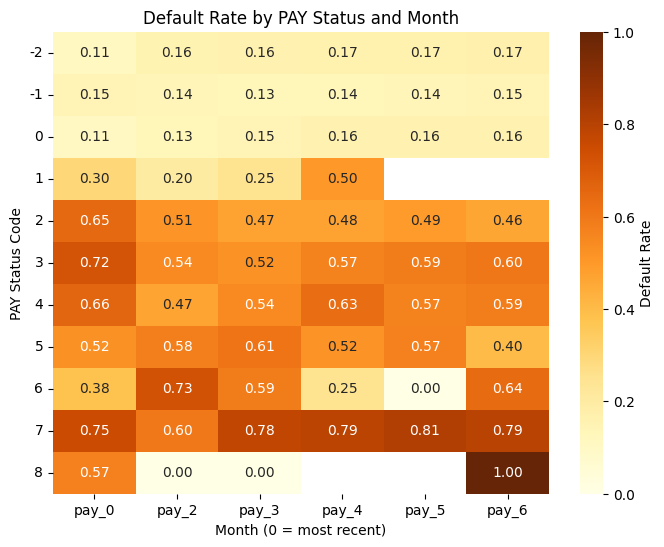

In [1789]:
# 1) Melt your pay‐status columns into long form
# Use the correct column names as in your DataFrame
pay_status_cols = ['pay_0', 'pay_2', 'pay_3', 'pay_4', 'pay_5', 'pay_6']
df_long = (
    df
    .reset_index()                         # preserve original index as “customer_id” if you like
    .melt(id_vars=['next_month_default'], 
          value_vars=pay_status_cols,
          var_name='month',
          value_name='pay_status')
)

# Convert next_month_default to int for aggregation
df_long['next_month_default'] = df_long['next_month_default'].astype(int)

# 2) Compute default rate by (month, pay_status)
pivot = (
    df_long
    .groupby(['month','pay_status'])['next_month_default']
    .mean()
    .reset_index()
    .pivot(index='pay_status', columns='month', values='next_month_default')
)

# 3) Plot heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(pivot, annot=True, fmt=".2f", cmap="YlOrBr", cbar_kws={'label':'Default Rate'})
plt.title("Default Rate by PAY Status and Month")
plt.xlabel("Month (0 = most recent)")
plt.ylabel("PAY Status Code")
plt.yticks(rotation=0)
plt.show()

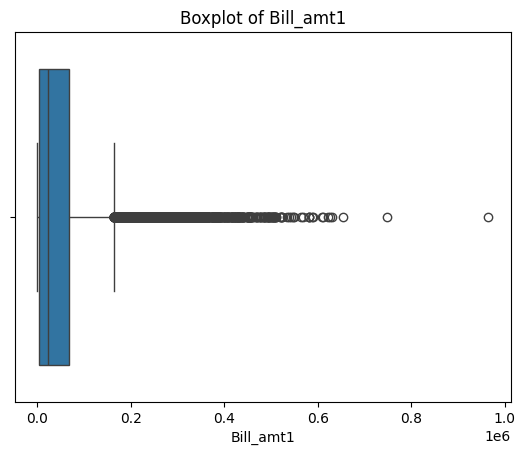

Negative values in bill columns:
0
Number of outliers in Bill_amt1: 1986
Shape after capping bill amounts outliers: (25247, 27)


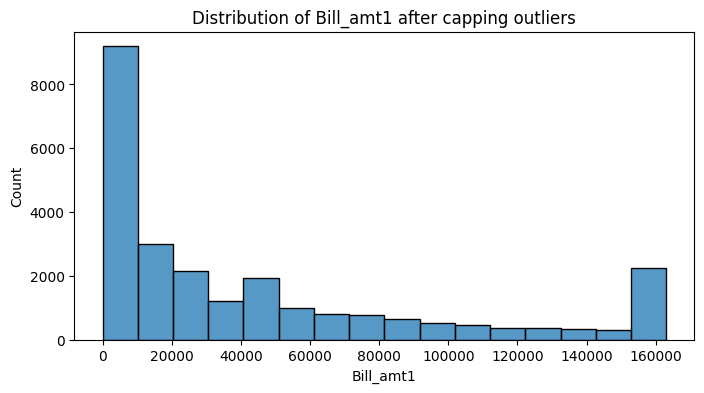

Negative values in bill columns after clipping:
0


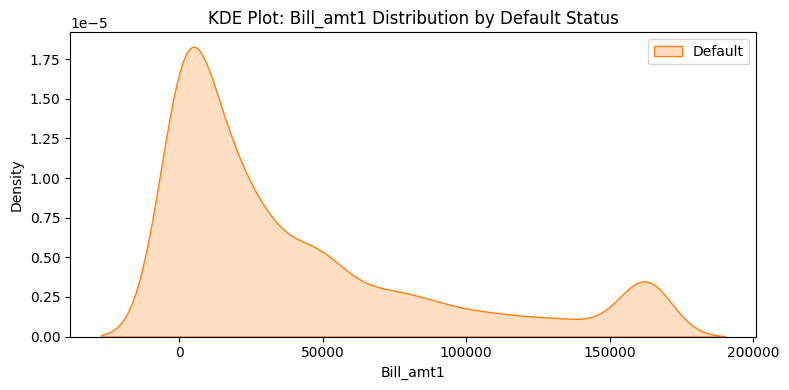

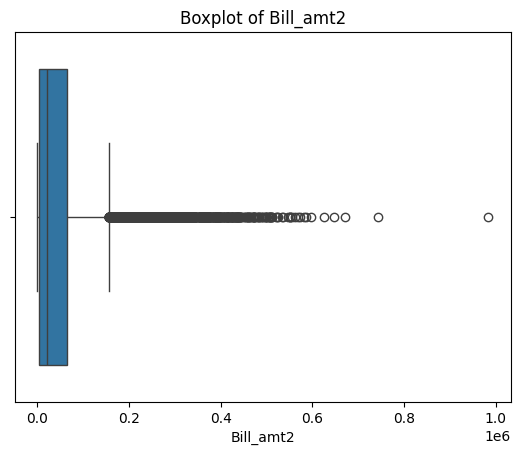

Negative values in bill columns:
0
Number of outliers in Bill_amt2: 1992
Shape after capping bill amounts outliers: (25247, 27)


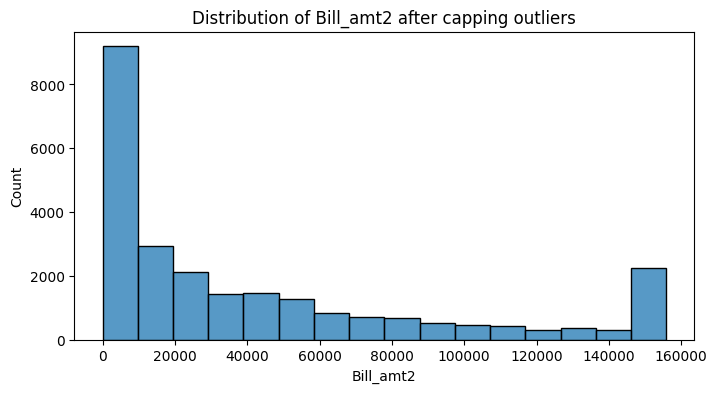

Negative values in bill columns after clipping:
0


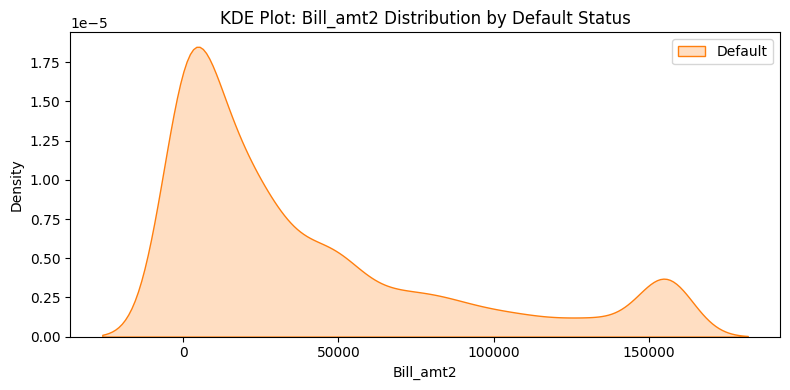

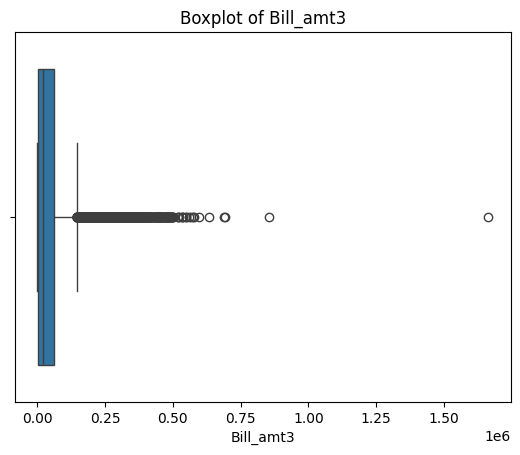

Negative values in bill columns:
0
Number of outliers in Bill_amt3: 2063
Shape after capping bill amounts outliers: (25247, 27)


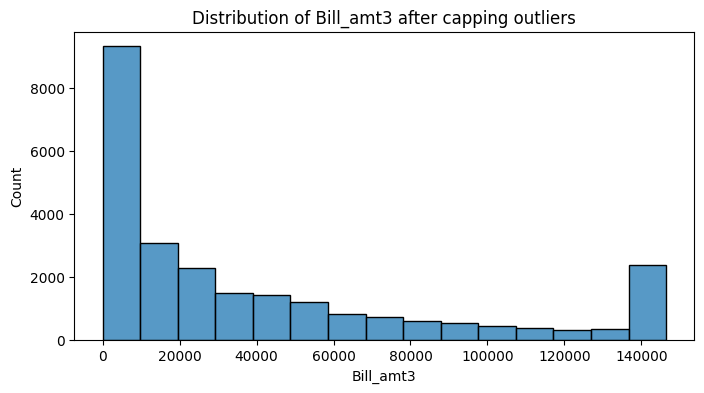

Negative values in bill columns after clipping:
0


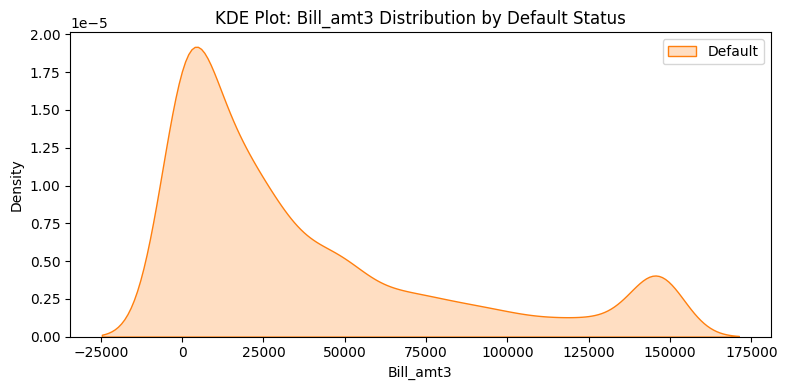

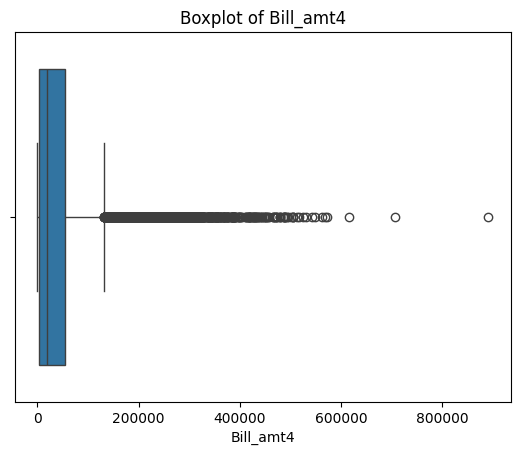

Negative values in bill columns:
0
Number of outliers in Bill_amt4: 2206
Shape after capping bill amounts outliers: (25247, 27)


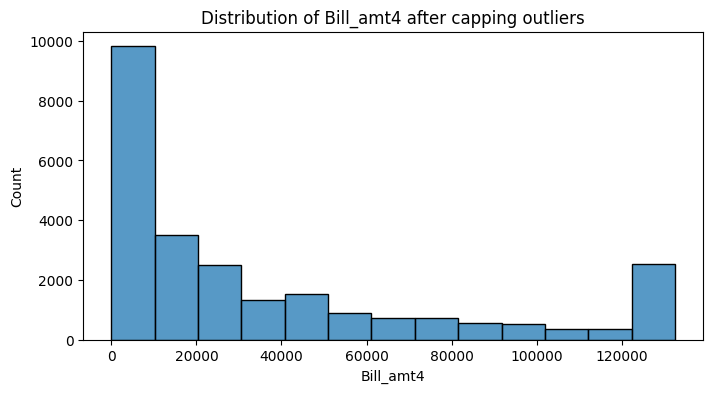

Negative values in bill columns after clipping:
0


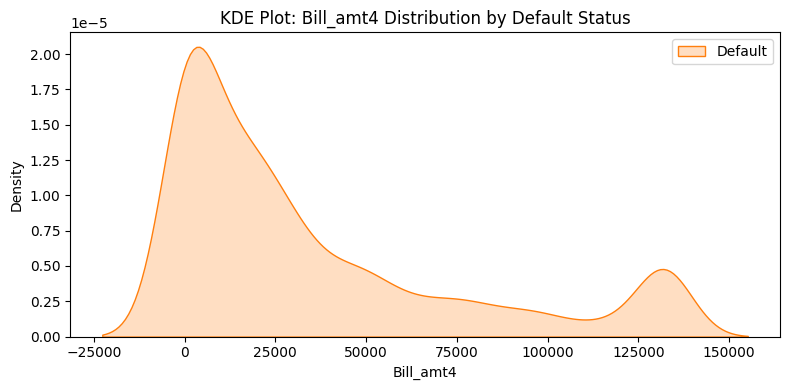

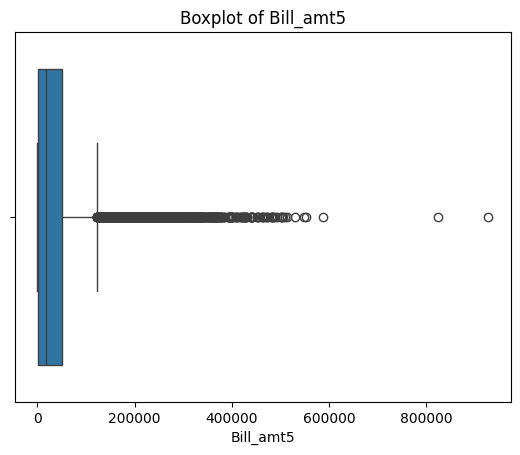

Negative values in bill columns:
0
Number of outliers in Bill_amt5: 2279
Shape after capping bill amounts outliers: (25247, 27)


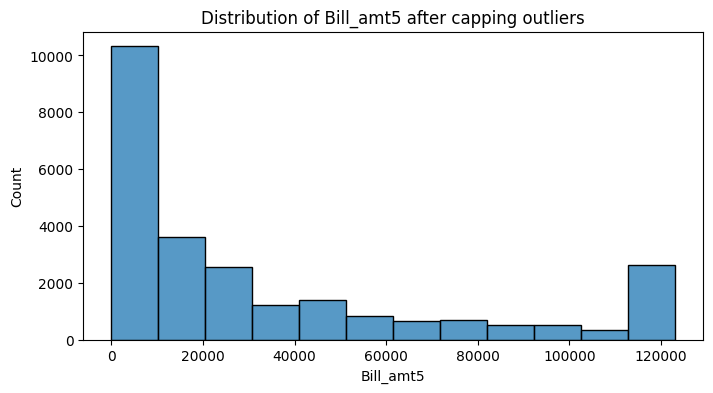

Negative values in bill columns after clipping:
0


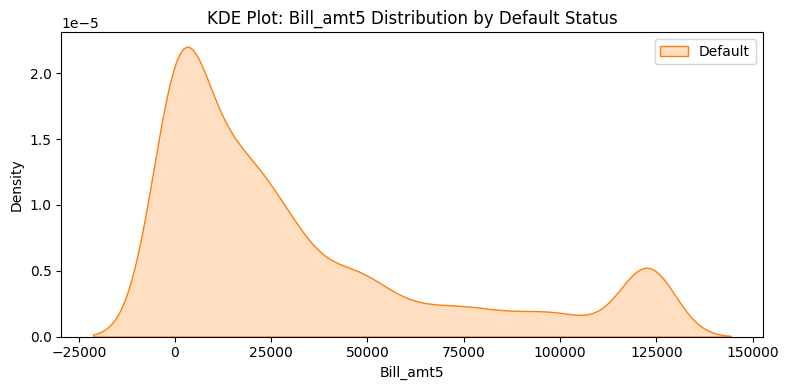

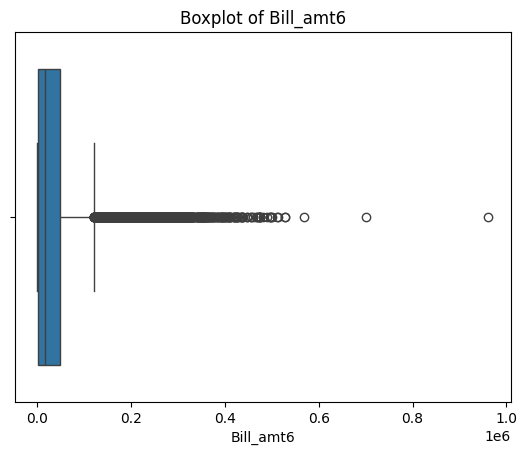

Negative values in bill columns:
0
Number of outliers in Bill_amt6: 2246
Shape after capping bill amounts outliers: (25247, 27)


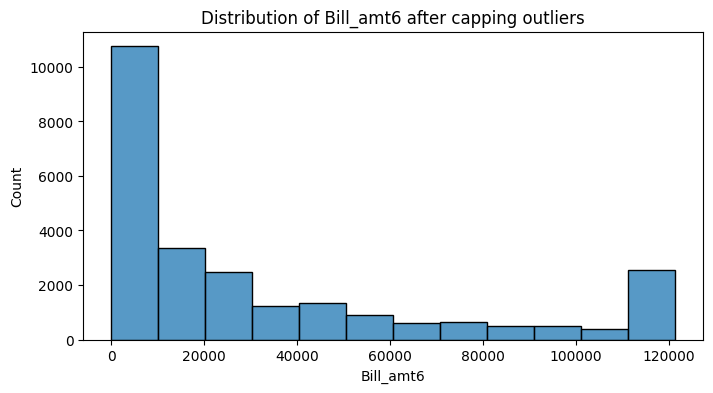

Negative values in bill columns after clipping:
0


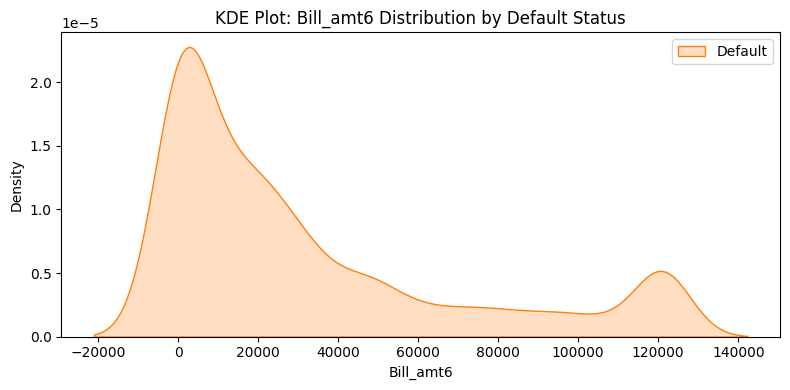


pay_amt1 summary stats:
count     25247.000000
mean       5718.624966
std       16806.842125
min           0.000000
25%         999.985000
50%        2145.020000
75%        5031.150000
max      873551.980000
Name: pay_amt1, dtype: float64 

pay_amt1 negative values: 0
pay_amt1 outliers  < -5046.76: 0,  > 11077.90: 2304


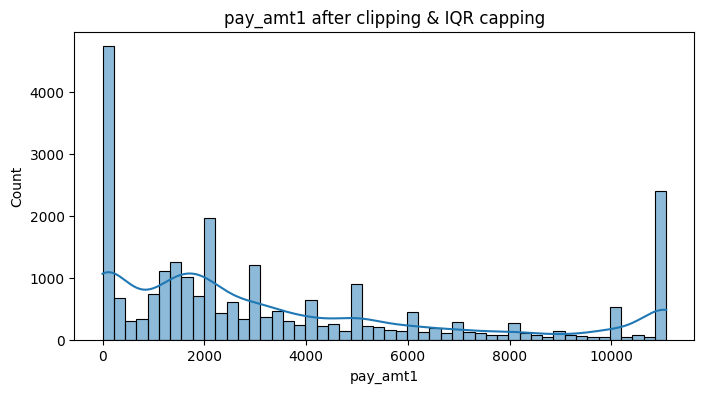


pay_amt2 summary stats:
count    2.524700e+04
mean     6.047352e+03
std      2.400962e+04
min      0.000000e+00
25%      9.219100e+02
50%      2.026830e+03
75%      5.000190e+03
max      1.684259e+06
Name: pay_amt2, dtype: float64 

pay_amt2 negative values: 0
pay_amt2 outliers  < -5195.51: 0,  > 11117.61: 2365


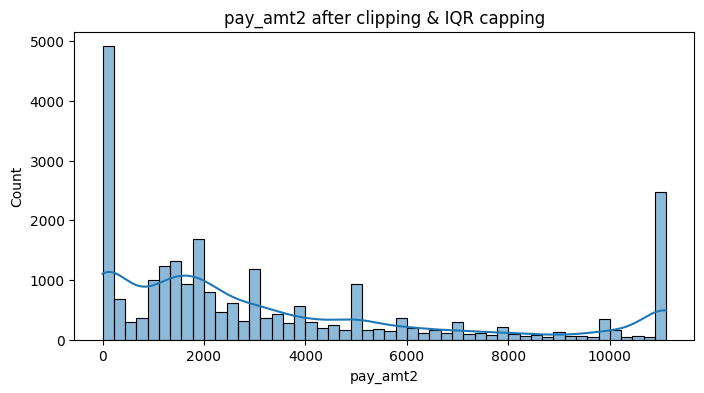


pay_amt3 summary stats:
count     25247.000000
mean       5288.910651
std       17851.879609
min           0.000000
25%         399.990000
50%        1844.300000
75%        4600.640000
max      896040.150000
Name: pay_amt3, dtype: float64 

pay_amt3 negative values: 0
pay_amt3 outliers  < -5900.98: 0,  > 10901.61: 2178


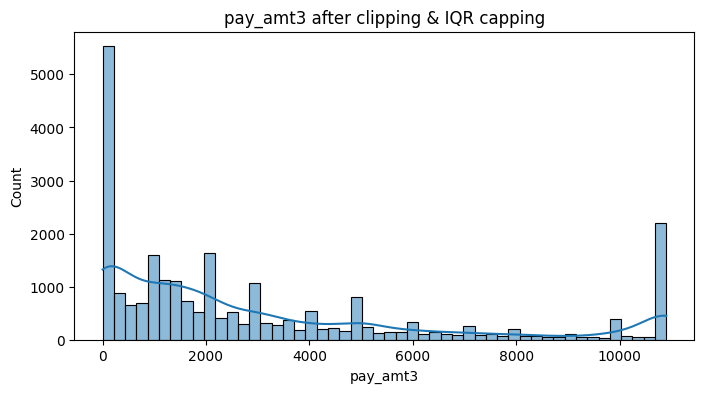


pay_amt4 summary stats:
count     25247.000000
mean       4865.960834
std       15979.116544
min           0.000000
25%         300.150000
50%        1500.100000
75%        4014.990000
max      621000.080000
Name: pay_amt4, dtype: float64 

pay_amt4 negative values: 0
pay_amt4 outliers  < -5272.11: 0,  > 9587.25: 2546


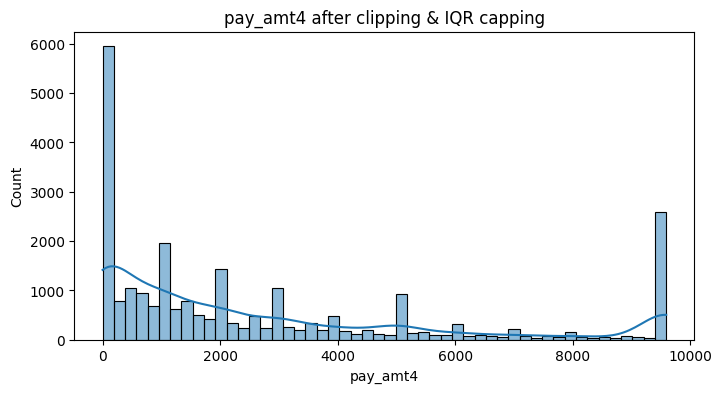


pay_amt5 summary stats:
count     25247.000000
mean       4906.766828
std       15860.726852
min           0.000000
25%         262.365000
50%        1513.790000
75%        4099.890000
max      426529.180000
Name: pay_amt5, dtype: float64 

pay_amt5 negative values: 0
pay_amt5 outliers  < -5493.92: 0,  > 9856.18: 2499


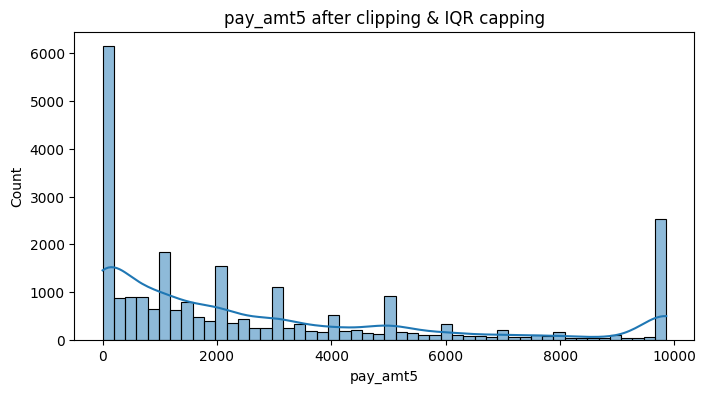


pay_amt6 summary stats:
count     25247.000000
mean       5270.499287
std       17960.816915
min           0.000000
25%         130.070000
50%        1500.040000
75%        4018.780000
max      528666.150000
Name: pay_amt6, dtype: float64 

pay_amt6 negative values: 0
pay_amt6 outliers  < -5702.99: 0,  > 9851.84: 2511


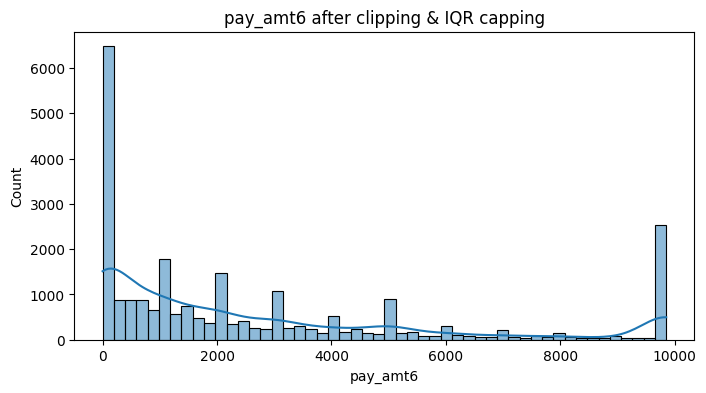

In [1790]:

# print("Shape after dropping outliers:", df.shape)

bill_cols = [f'Bill_amt{i}' for i in range(1, 7)]

for col in bill_cols:
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot of {col}')
    plt.show()
# Check for negative values in bill columns
    print("Negative values in bill columns:")
    print(df[col].lt(0).sum())
# If negative values exist, replace them with 0
    df[col] = df[col].clip(lower=0)
# Clip the bill amounts with IQR method
# Capping the bill amounts to upper IQR bound
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
# print number of outliers in bill amounts
    outliers = df[(df[col] < (Q1 - 1.5 * IQR)) | (df[col] > (Q3 + 1.5 * IQR))]
    print(f'Number of outliers in {col}: {len(outliers)}')
    df[col] = df[col].clip(lower=Q1 - 1.5 * IQR, upper=Q3 + 1.5 * IQR)
# Print dimensions after cleaning
    print("Shape after capping bill amounts outliers:", df.shape)
    plt.figure(figsize=(8, 4))
    sns.histplot(df[col], binwidth=10000)
    plt.title(f'Distribution of {col} after capping outliers')
    plt.xlabel(col)
    plt.ylabel("Count")
    plt.show()

# Check for negative values in bill columns after clipping
    print("Negative values in bill columns after clipping:")
    print(df[col].lt(0).sum())
# KDE plot for Bill Amounts with default status
    plt.figure(figsize=(8, 4))
    sns.kdeplot(
        data=df[df['next_month_default'] == 1],
        x=col,
        label='Default',
        fill=True,
        color="#ff7f0e"
    )
    plt.title(f"KDE Plot: {col} Distribution by Default Status")
    plt.xlabel(col)
    plt.ylabel("Density")
    plt.legend()
    plt.tight_layout()
    plt.show()


#similarly for pay amounts
pay_cols = [f'pay_amt{i}' for i in range(1, 7)]
for col in pay_cols:
    print("\n" + "="*40)
    print(col, "summary stats:")
    print(df[col].describe(), "\n")
    
    # clip negatives
    negs = (df[col] < 0).sum()
    print(f"{col} negative values: {negs}")
    df[col] = df[col].clip(lower=0)
    
    # IQR bounds
    Q1, Q3 = df[col].quantile([0.25, 0.75])
    IQR = Q3 - Q1
    low, high = Q1 - 1.5*IQR, Q3 + 1.5*IQR
    lo_count = (df[col] < low).sum()
    hi_count = (df[col] > high).sum()
    print(f"{col} outliers  < {low:.2f}: {lo_count},  > {high:.2f}: {hi_count}")
    df[col] = df[col].clip(lower=low, upper=high)
    
    # histogram with smaller bins
    plt.figure(figsize=(8,4))
    sns.histplot(df[col], bins=50, kde=True)
    plt.title(f"{col} after clipping & IQR capping")
    plt.xlabel(col)
    plt.ylabel("Count")
    plt.show()


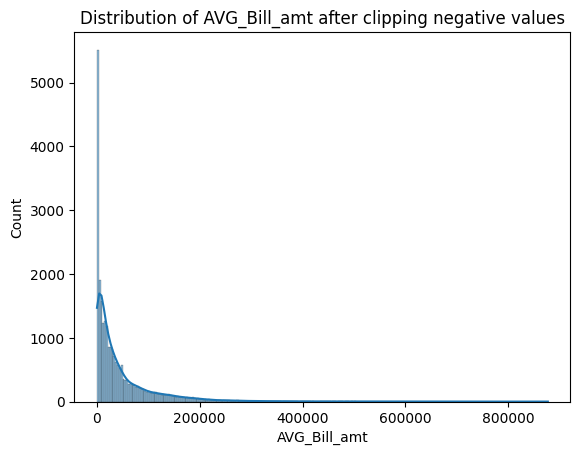

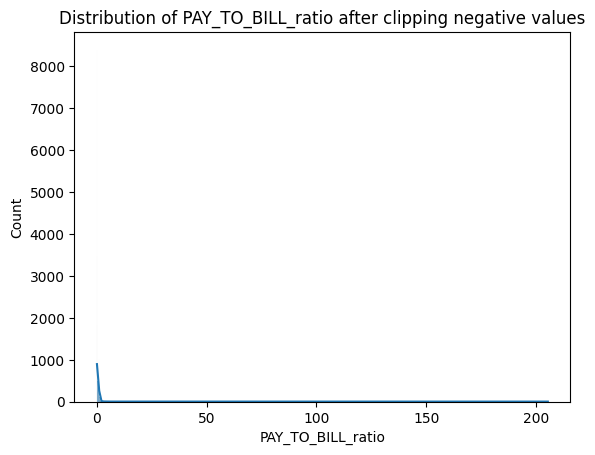

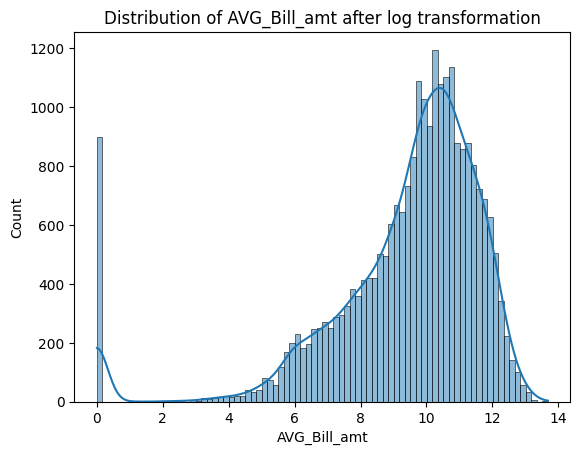

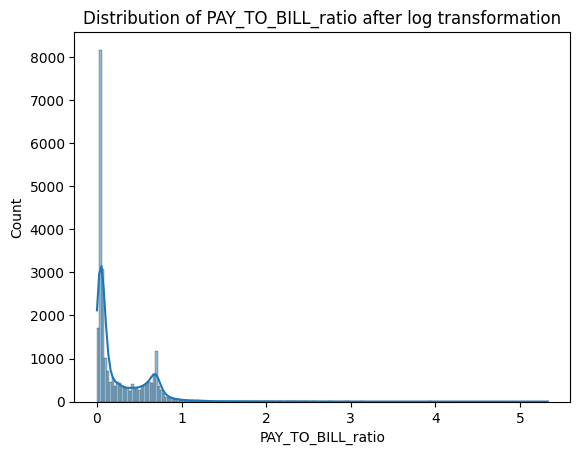

After capping, AVG_Bill_amt shape: (25247,)


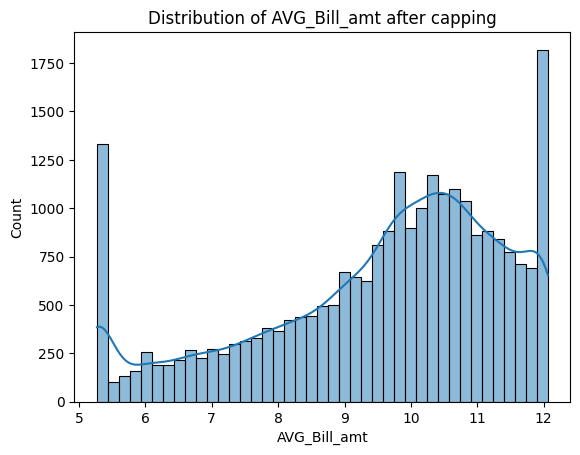

After capping, PAY_TO_BILL_ratio shape: (25247,)


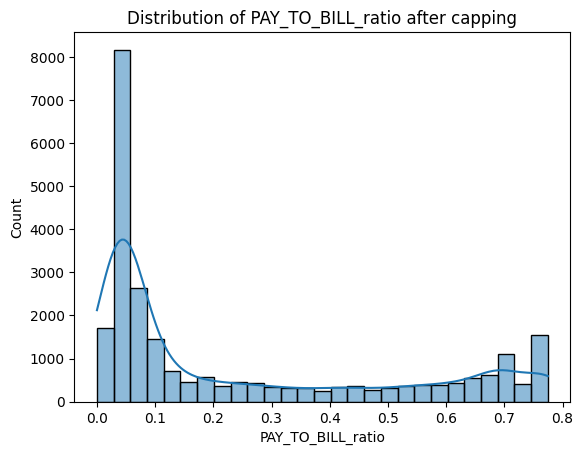

In [1791]:
eng_cols = ['AVG_Bill_amt', 'PAY_TO_BILL_ratio']

# for col in eng_cols:
#     # lower = df[col].quantile(0.005)
#     # upper = df[col].quantile(0.975)
#     # df = df[(df[col] >= lower) & (df[col] <= upper)]
#     # df.reset_index(drop=True, inplace=True)
#     # print(f"After capping, {col} shape: {df[col].shape}")
#     # now plot
#     sns.histplot(df[col], kde=True)
#     plt.title(f'Distribution of {col} after capping')
#     plt.show()

# clip eng_cols to 0.005 and 0.975 quantiles
# for col in eng_cols:
#     lower = df[col].quantile(0.005)
#     upper = df[col].quantile(0.975)
#     df[col] = df[col].clip(lower=lower, upper=upper)
#     print(f"After capping, {col} shape: {df[col].shape}")
#     # now plot
#     sns.histplot(df[col], kde=True)
#     plt.title(f'Distribution of {col} after capping')
#     plt.show()


#make negative values in engineering columns to 0
for col in eng_cols:
    df[col] = df[col].clip(lower=0)
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribution of {col} after clipping negative values')
    plt.show()

#apply log transformation to engineering columns
for col in eng_cols:
    if(col == 'pay_TO_BILL_ratio'):
        continue
    df[col] = np.log1p(df[col])  # log1p handles zero values correctly
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribution of {col} after log transformation')
    plt.show()

# Clip the engineering columns to 0.005 and 0.975 quantiles
for col in eng_cols:
    lower = df[col].quantile(0.05)
    upper = df[col].quantile(0.95)
    df[col] = df[col].clip(lower=lower, upper=upper)
    print(f"After capping, {col} shape: {df[col].shape}")
    # now plot
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribution of {col} after capping')
    plt.show()
    
# see later

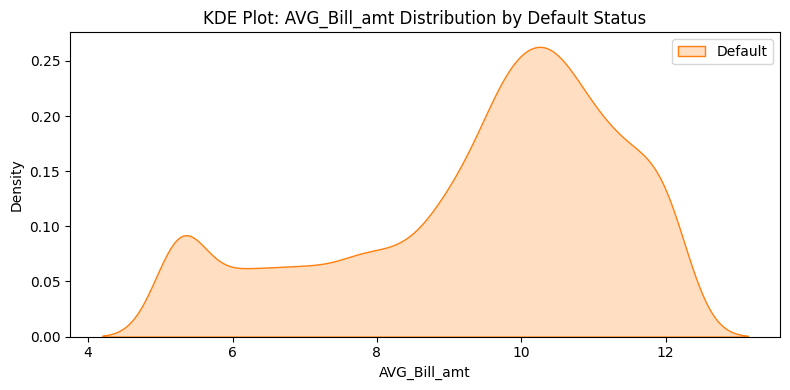

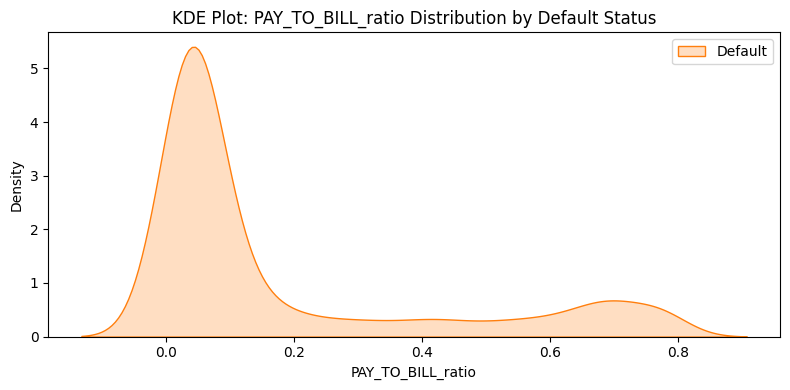

In [1792]:
# relation between engineering columns and default status
# kde plot for AVG_Bill_amt (log transformed) with default status

plt.figure(figsize=(8, 4))
sns.kdeplot(
    data=df[df['next_month_default'] == 1],
    x='AVG_Bill_amt',
    label='Default',
    fill=True,
    color="#ff7f0e"
)


plt.title("KDE Plot: AVG_Bill_amt Distribution by Default Status")
plt.xlabel("AVG_Bill_amt")
plt.ylabel("Density")
plt.legend()
plt.tight_layout()
plt.show()
# kde plot for PAY_TO_BILL_ratio with default status
plt.figure(figsize=(8, 4))
sns.kdeplot(
    data=df[df['next_month_default'] == 1],
    x='PAY_TO_BILL_ratio',
    label='Default',
    fill=True,
    color="#ff7f0e"
)





plt.title("KDE Plot: PAY_TO_BILL_ratio Distribution by Default Status")
plt.xlabel("PAY_TO_BILL_ratio")
plt.ylabel("Density")
plt.legend()
plt.tight_layout()
plt.show()




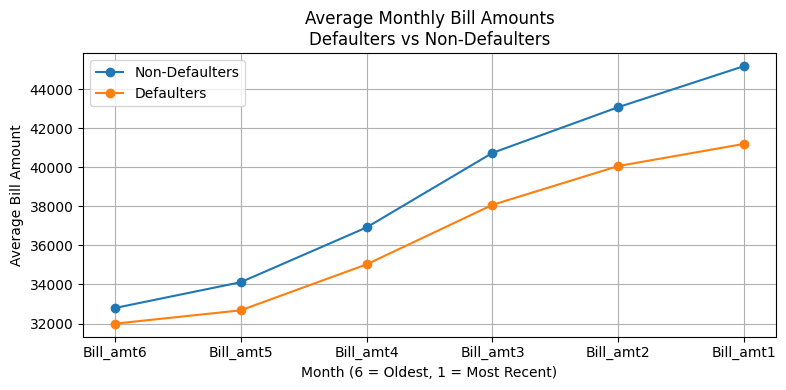

In [1793]:
# EDA for Bill Amounts# Columns for monthly bill amounts
bill_cols = ['Bill_amt6', 'Bill_amt5', 'Bill_amt4', 'Bill_amt3', 'Bill_amt2', 'Bill_amt1']  # reversed for chronological order

# Group by default status
bill_means = df.groupby('next_month_default')[bill_cols].mean().T
bill_means.columns = ['Non-Defaulters', 'Defaulters'] if 0 in bill_means.columns else ['Defaulters', 'Non-Defaulters']

# Plot
bill_means.plot(figsize=(8, 4), marker='o')
plt.title("Average Monthly Bill Amounts\nDefaulters vs Non-Defaulters")
plt.xlabel("Month (6 = Oldest, 1 = Most Recent)")
plt.ylabel("Average Bill Amount")
plt.grid(True)
plt.tight_layout()
plt.show()

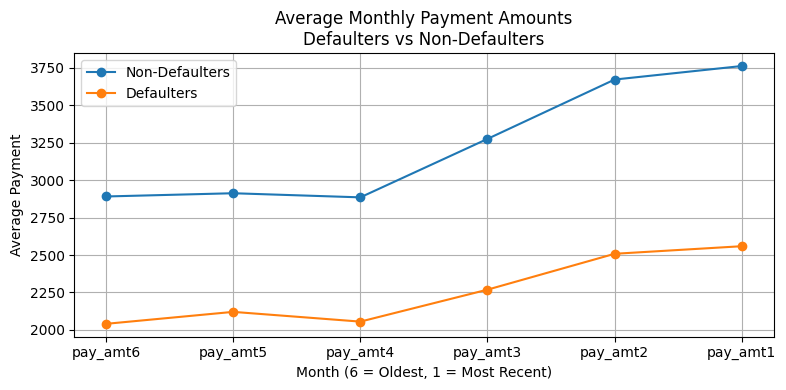

In [1794]:
# Payment columns (chronologically reversed)
pay_cols_amt = ['pay_amt6', 'pay_amt5', 'pay_amt4', 'pay_amt3', 'pay_amt2', 'pay_amt1']

# Group by default status and calculate average
pay_means = df.groupby('next_month_default')[pay_cols_amt].mean().T
pay_means.columns = ['Non-Defaulters', 'Defaulters'] if 0 in pay_means.columns else ['Defaulters', 'Non-Defaulters']

# Plot
pay_means.plot(figsize=(8, 4), marker='o')
plt.title("Average Monthly Payment Amounts\nDefaulters vs Non-Defaulters")
plt.xlabel("Month (6 = Oldest, 1 = Most Recent)")
plt.ylabel("Average Payment")
plt.grid(True)
plt.tight_layout()
plt.show()

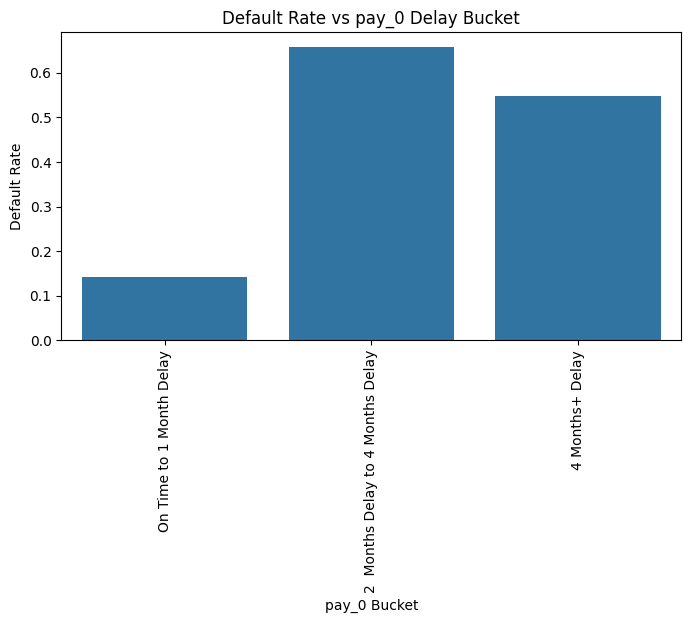

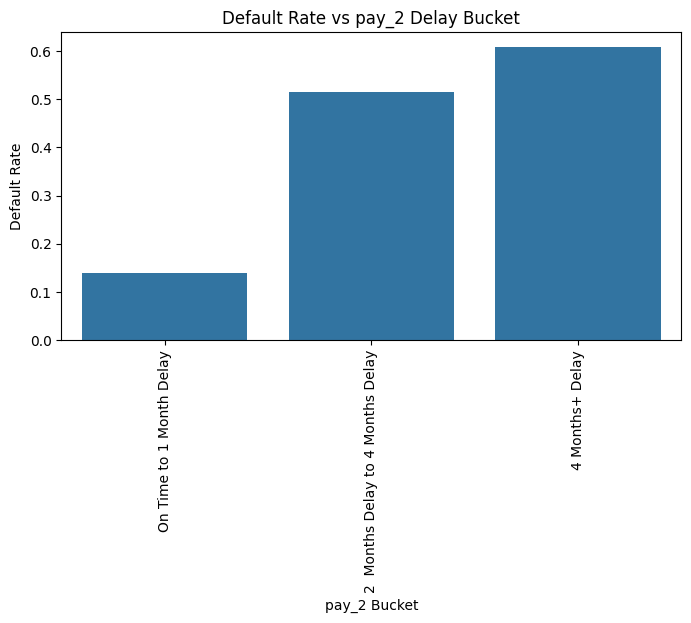

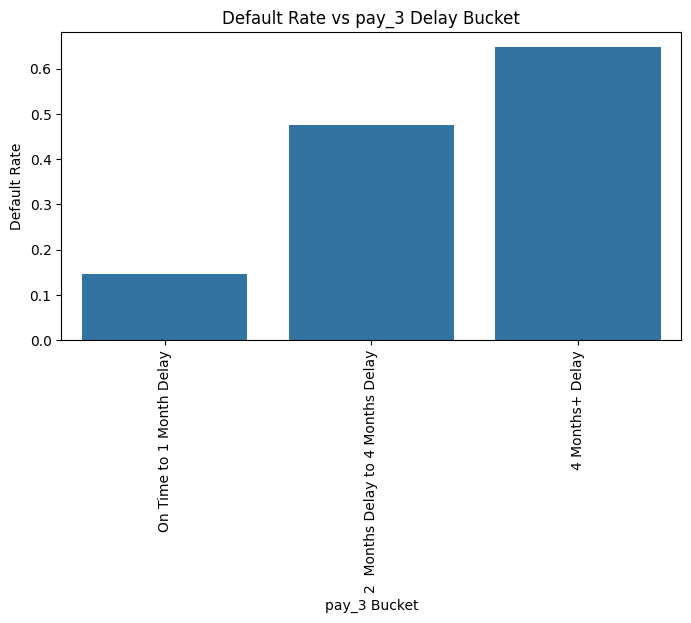

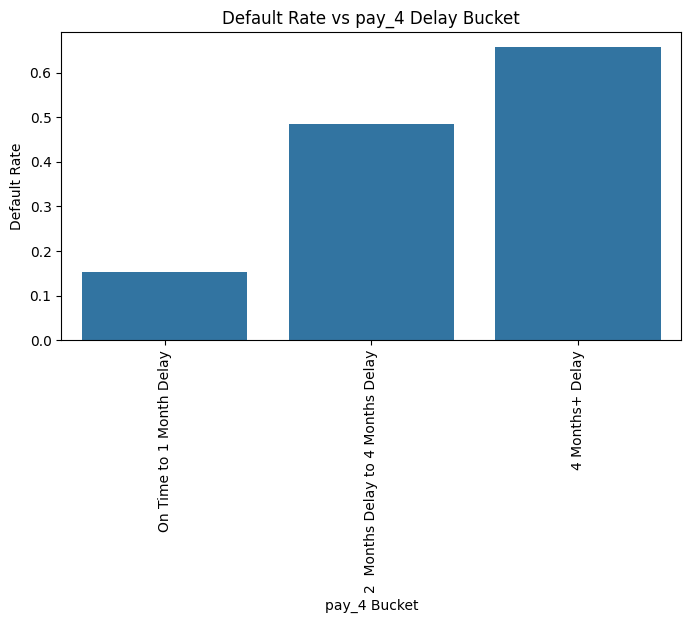

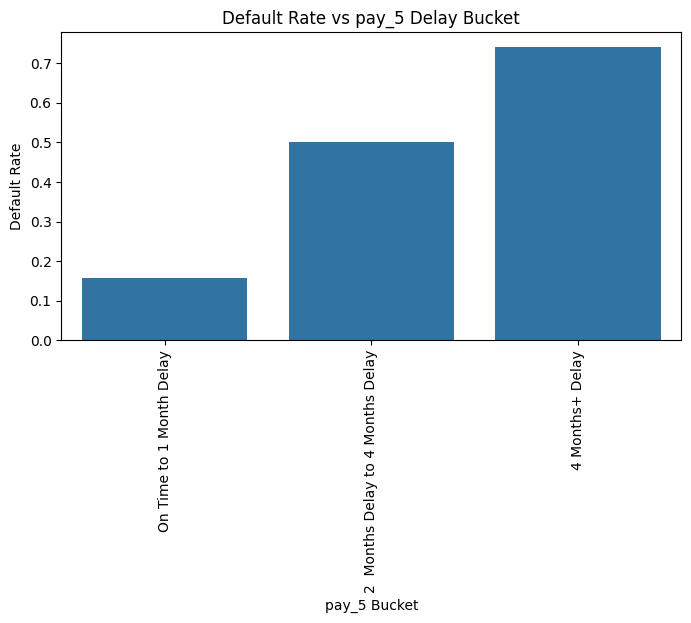

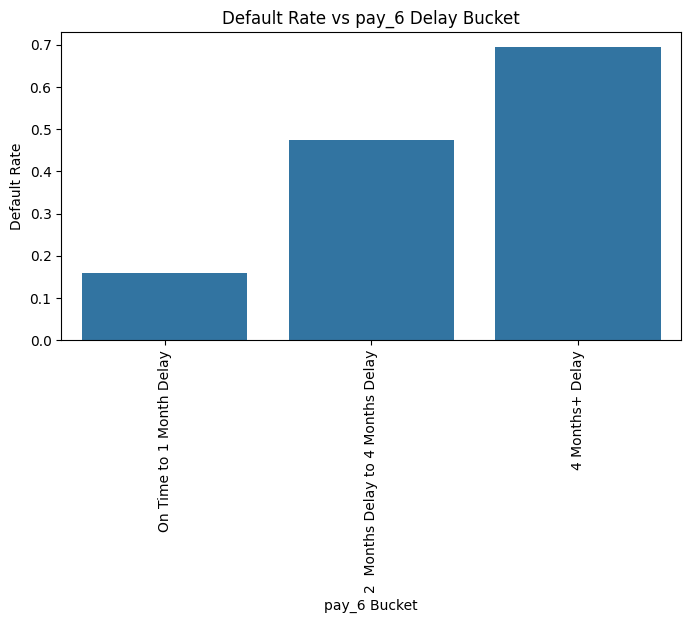

In [1795]:
# Define delay_bucket function
def delay_bucket(x):
    if x <= 1:
        return 'On Time to 1 Month Delay'
    elif 2 <= x <= 4:
        return '2  Months Delay to 4 Months Delay'
    else:
        return '4 Months+ Delay'

#for pay_0 to pay_6, create buckets and plot default rate
for col in pay_status_cols[:]:
    df[f'{col}_bucket'] = df[col].apply(delay_bucket)
    grouped = df.groupby(f'{col}_bucket')['next_month_default'].agg(['mean', 'count']).reset_index()
    grouped.columns = [f'{col}_bucket', 'default_rate', 'count']
    
    plt.figure(figsize=(8, 4))
    sns.barplot(x=f'{col}_bucket', y='default_rate', data=grouped, order=[
        'On Time to 1 Month Delay', 
        '2  Months Delay to 4 Months Delay', 
        '4 Months+ Delay'
    ])
    plt.xticks(rotation=90)
    plt.title(f'Default Rate vs {col} Delay Bucket')
    plt.ylabel('Default Rate')
    plt.xlabel(f'{col} Bucket')
    plt.show()

C:\Users\krish\AppData\Local\Temp\ipykernel_146648\2224031925.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_limit = df.groupby('LIMIT_BAL_bucket')['next_month_default'].agg(['mean', 'count']).reset_index()


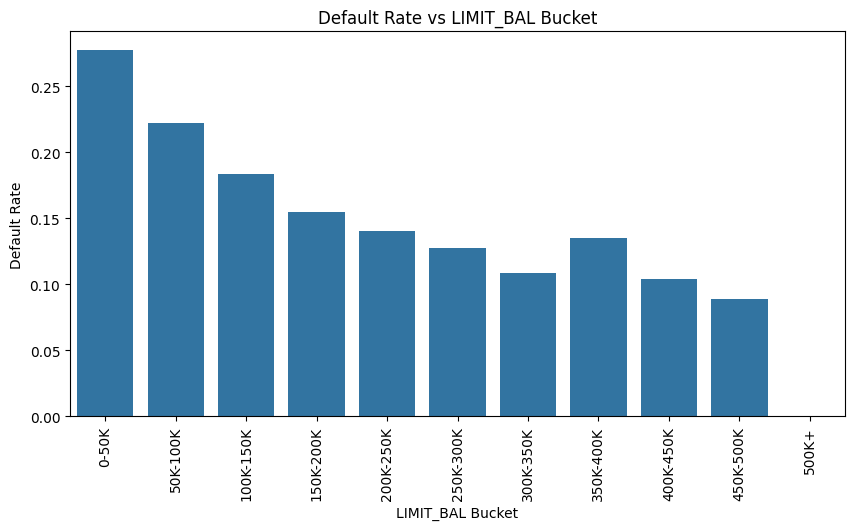

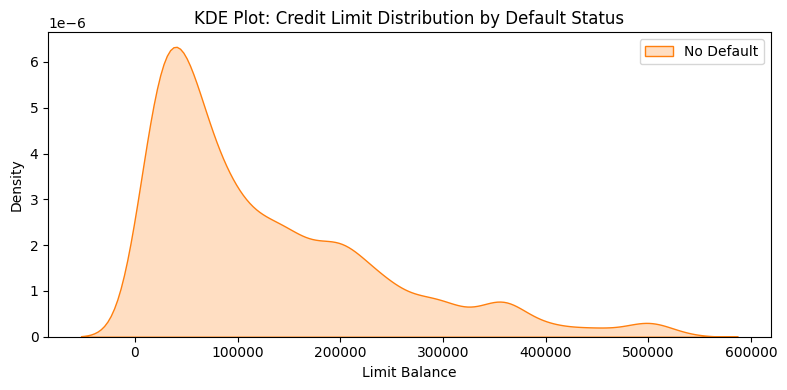

In [1796]:
# Create LIMIT_BAL buckets
bins = [0, 50000, 100000, 150000, 200000, 250000, 300000, 350000, 400000, 450000, 5000000, np.inf]
labels = ['0-50K', '50K-100K', '100K-150K', '150K-200K', '200K-250K', '250K-300K', '300K-350K', '350K-400K', '400K-450K', '450K-500K', '500K+']

df['LIMIT_BAL_bucket'] = pd.cut(df['LIMIT_BAL'], bins=bins, labels=labels)

# Compute default rate for each LIMIT_BAL bucket
grouped_limit = df.groupby('LIMIT_BAL_bucket')['next_month_default'].agg(['mean', 'count']).reset_index()

grouped_limit.columns = ['LIMIT_BAL_bucket', 'default_rate', 'count']
# Plot default rate for LIMIT_BAL buckets
plt.figure(figsize=(10, 5))
sns.barplot(x='LIMIT_BAL_bucket', y='default_rate', data=grouped_limit)
plt.xticks(rotation=90)
plt.title('Default Rate vs LIMIT_BAL Bucket')
plt.ylabel('Default Rate')
plt.xlabel('LIMIT_BAL Bucket')
plt.show()


#also plot a continuous plot for LIMIT_BAL something like a kde plot
plt.figure(figsize=(8, 4))
sns.kdeplot(
    data=df[df['next_month_default'] == 1],
    x='LIMIT_BAL',
    label='No Default',
    fill=True,
    color="#ff7f0e"
)

plt.title("KDE Plot: Credit Limit Distribution by Default Status")
plt.xlabel("Limit Balance")
plt.ylabel("Density")
plt.legend()
plt.tight_layout()
plt.show()




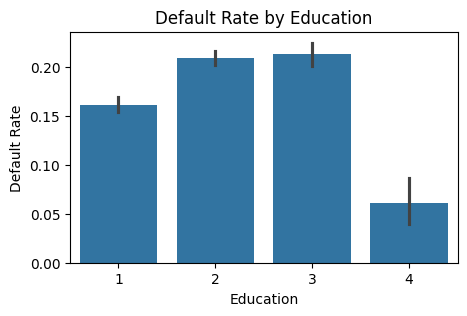

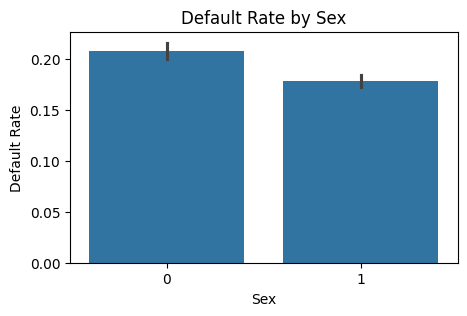

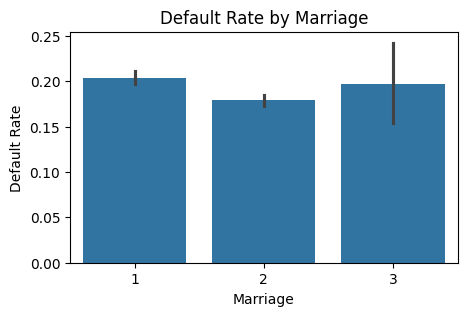

In [1797]:
categorical_vars = ['education', 'sex', 'marriage']

for var in categorical_vars:
    plt.figure(figsize=(5, 3))
    sns.barplot(x=var, y='next_month_default', data=df)
    plt.title(f'Default Rate by {var.capitalize()}')
    plt.ylabel('Default Rate')
    plt.xlabel(var.capitalize())
    plt.show()


In [1798]:

df.drop(columns=['Customer_ID'], inplace=True)


In [1799]:
df['sex'] = df['sex'].astype('category')
df['education'] = df['education'].astype('category')
df['marriage'] = df['marriage'].astype('category')
df['next_month_default'] = df['next_month_default'].astype('category')


In [1800]:

# drop 'pay_0_bucket', 'pay_2_bucket', 'pay_3_bucket', 'pay_4_bucket', 'pay_5_bucket', 'pay_6_bucket', 'LIMIT_BAL_bucket'
df.drop(columns=['pay_0_bucket', 'pay_2_bucket', 'pay_3_bucket', 'pay_4_bucket', 'pay_5_bucket', 'pay_6_bucket', 'LIMIT_BAL_bucket'], inplace=True)

#print dimensions of the dataset
print("Final dataset shape:", df.shape)

#print cols
print("Columns in the final dataset:")
print(df.columns.tolist())


Final dataset shape: (25247, 26)
Columns in the final dataset:
['marriage', 'sex', 'education', 'LIMIT_BAL', 'age', 'pay_0', 'pay_2', 'pay_3', 'pay_4', 'pay_5', 'pay_6', 'Bill_amt1', 'Bill_amt2', 'Bill_amt3', 'Bill_amt4', 'Bill_amt5', 'Bill_amt6', 'pay_amt1', 'pay_amt2', 'pay_amt3', 'pay_amt4', 'pay_amt5', 'pay_amt6', 'AVG_Bill_amt', 'PAY_TO_BILL_ratio', 'next_month_default']


In [1801]:

df.head()

,marriage,sex,education,LIMIT_BAL,age,pay_0,pay_2,pay_3,pay_4,pay_5,...,Bill_amt6,pay_amt1,pay_amt2,pay_amt3,pay_amt4,pay_amt5,pay_amt6,AVG_Bill_amt,PAY_TO_BILL_ratio,next_month_default
0,2,0,2,60000,25.0,2,2,2,0,0,...,20750.63,2000.21,0.00,1134.850,1821.78,1500.03,1500.24,10.633750,0.029559,0
1,2,1,1,290000,24.0,0,0,-2,-2,-1,...,1350.30,0.00,0.17,0.000,2700.10,0.00,1349.72,7.838146,0.239017,0
2,1,0,2,180000,60.5,0,0,0,0,0,...,52991.51,2086.94,2199.99,1845.660,2000.35,1923.00,1999.78,10.828203,0.039221,0
3,1,1,2,210000,43.0,0,0,0,0,0,...,76945.47,3348.07,3380.91,3400.450,2683.97,2744.00,2892.10,11.364779,0.039221,0
4,2,0,1,280000,32.0,-2,-2,-2,-2,-2,...,1.35,999.78,3186.27,10901.615,2100.09,0.01,0.27,9.377153,0.542324,0


In [1802]:
import numpy as np

# 1. UTILIZATION FEATURES
df['utilization'] = df[[f'Bill_amt{i}' for i in range(1, 7)]].sum(axis=1) / (6 * df['LIMIT_BAL'] + 1e-6)
df['recent_utilization'] = df['Bill_amt1'] / (df['LIMIT_BAL'] + 1e-6)

# 2. PAYMENT TO BILL RATIOS
df['avg_pay_ratio'] = df[[f'pay_amt{i}' for i in range(1, 7)]].sum(axis=1) / (df[[f'Bill_amt{i}' for i in range(1, 7)]].sum(axis=1) + 1e-6)
df['recent_payment_ratio'] = df['pay_amt1'] / (df['Bill_amt1'] + 1e-6)

# 3. BILL AND PAYMENT STATS
df['bill_mean'] = df[[f'Bill_amt{i}' for i in range(1, 7)]].mean(axis=1)
df['bill_std'] = df[[f'Bill_amt{i}' for i in range(1, 7)]].std(axis=1)
df['pay_mean'] = df[[f'pay_amt{i}' for i in range(1, 7)]].mean(axis=1)
df['pay_std'] = df[[f'pay_amt{i}' for i in range(1, 7)]].std(axis=1)

# 4. DELINQUENCY STREAKS & PATTERNS
pay_cols = ['pay_0', 'pay_2', 'pay_3', 'pay_4', 'pay_5', 'pay_6']
df['overdue_count'] = (df[pay_cols] >= 1).sum(axis=1)
df['avg_delinquency'] = df[pay_cols].replace([-2, -1], 0).mean(axis=1)
df['on_time_count'] = (df[pay_cols] == -1).sum(axis=1)
df['recent_delinquency'] = df['pay_0'].apply(lambda x: max(x, 0))

# Max consecutive months of delay
def max_consec(arr):
    max_run = run = 0
    for x in arr:
        if x >= 1:
            run += 1
            max_run = max(max_run, run)
        else:
            run = 0
    return max_run
df['max_overdue_streak'] = df[pay_cols].apply(lambda row: max_consec(row.values), axis=1)

# Months since last overdue
def last_overdue(row):
    for i, x in enumerate(row):
        if x >= 1:
            return i  # 0 = most recent
    return len(row)
df['months_since_overdue'] = df[pay_cols].apply(lambda r: last_overdue(r.values), axis=1)

# 5. PAYMENT CONSISTENCY
df['repayment_consistency'] = df[[f'pay_amt{i}' for i in range(1, 7)]].apply(lambda row: (row > 0).sum(), axis=1) / 6

# 6. SHORTFALL & BEHAVIOR RATIOS
df['shortfall_count'] = sum(df[f'pay_amt{i}'] < df[f'Bill_amt{i}'] for i in range(1, 7))
df['rev_to_ontime'] = (df[pay_cols] == 0).sum(axis=1) / ((df[pay_cols] == -1).sum(axis=1) + 1e-6)
df['rev_to_ontime'].fillna(0, inplace=True)



C:\Users\krish\AppData\Local\Temp\ipykernel_146648\3048027819.py:50: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['rev_to_ontime'].fillna(0, inplace=True)


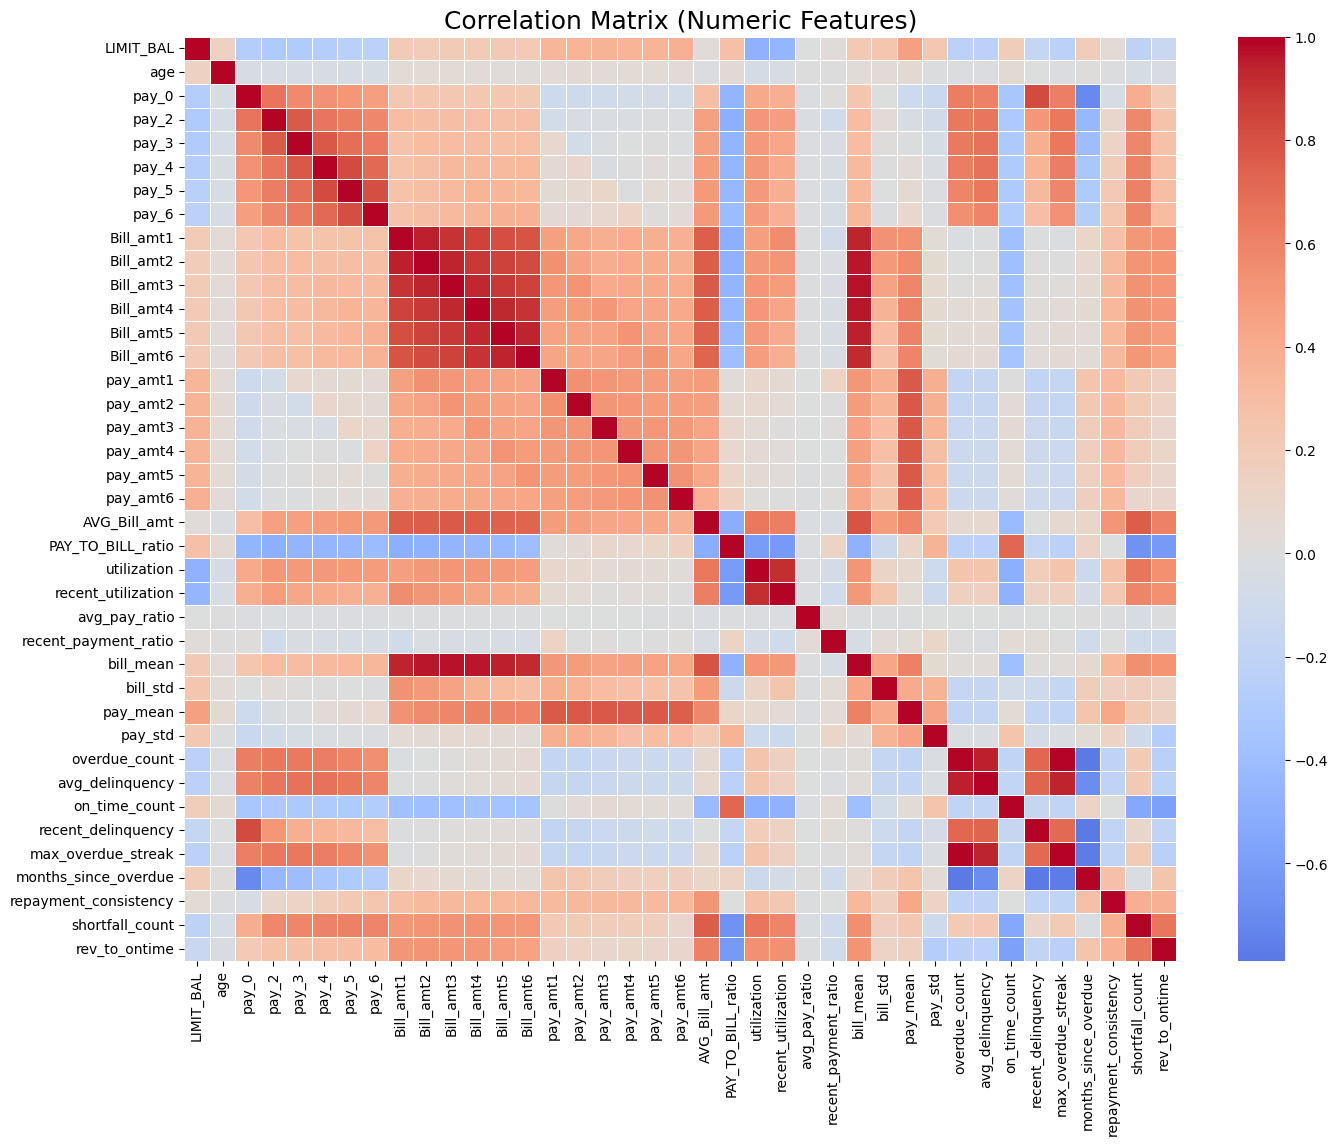

In [1803]:
# plot overall correlation matrix
numeric_df = df.select_dtypes(include='number')

# Compute correlation matrix
corr_matrix = numeric_df.corr()

# Plot the heatmap
plt.figure(figsize=(16, 12))
sns.heatmap(corr_matrix, annot=False, cmap='coolwarm', center=0, linewidths=0.5)
plt.title('Correlation Matrix (Numeric Features)', fontsize=18)
plt.show()

In [1804]:
selected_features = [
    'age',
    'utilization', 'recent_utilization', 'avg_pay_ratio', 'recent_payment_ratio',
    'bill_std',  'pay_std', 'pay_std',
    'overdue_count', 'on_time_count', 'avg_delinquency', 'recent_delinquency',
    'max_overdue_streak', 'months_since_overdue',
    'shortfall_count', 'rev_to_ontime', 'repayment_consistency',
    'LIMIT_BAL', 'bill_mean', 'pay_mean',
    "AVG_Bill_amt",	"PAY_TO_BILL_ratio"
]

X = df[selected_features]
y = df['next_month_default']


In [1805]:
# Step 2: Stratified Train-Test Split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, stratify=y, random_state=42)


#Step 3: SMOTE for Class Imbalance Handling
# from imblearn.over_sampling import SMOTE
# smote = SMOTE(random_state=42)
# X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

from imblearn.combine import SMOTETomek
smk = SMOTETomek(random_state=42)
X_train_res, y_train_res = smk.fit_resample(X_train, y_train)

print("After SMOTETomek Resampling:")
print("Class distribution:", y_train_res.value_counts())


After SMOTETomek Resampling:
Class distribution: next_month_default
0    13365
1    13365
Name: count, dtype: int64


In [1806]:
from sklearn.metrics import fbeta_score, precision_score, recall_score, accuracy_score, roc_auc_score

def evaluate_model(y_true, y_pred, y_prob):
    print("Accuracy:", accuracy_score(y_true, y_pred))
    print("Precision:", precision_score(y_true, y_pred))
    print("Recall:", recall_score(y_true, y_pred))
    print("F1-score:", fbeta_score(y_true, y_pred, beta=1))
    print("F2-score:", fbeta_score(y_true, y_pred, beta=2))
    print("AUC-ROC:", roc_auc_score(y_true, y_prob))

# Step 5: Train and Evaluate Multiple Models
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
import numpy as np

models = {
    'Random Forest': RandomForestClassifier(class_weight='balanced', random_state=42),
    'XGBoost': XGBClassifier(use_label_encoder=False, eval_metric='logloss', scale_pos_weight=1, random_state=42),
    'Logistic Regression': LogisticRegression(class_weight='balanced', max_iter=1000, random_state=42),
}

In [1807]:
# Step 6: Train, Threshold Tune (for F2), and Evaluate
for name, model in models.items():
    model.fit(X_train_res, y_train_res)
    y_prob = model.predict_proba(X_test)[:, 1]

    # Threshold tuning to maximize F2
    thresholds = np.arange(0.1, 0.9, 0.01)
    f2_scores = [fbeta_score(y_test, y_prob >= t, beta=2) for t in thresholds]
    best_thresh = thresholds[np.argmax(f2_scores)]

    print(f"\n{name} — Best Threshold for F2: {best_thresh:.2f}")
    y_pred = (y_prob >= best_thresh).astype(int)
    evaluate_model(y_test, y_pred, y_prob)


Random Forest — Best Threshold for F2: 0.19
Accuracy: 0.5853465346534653
Precision: 0.29081507017975866
Recall: 0.819001386962552
F1-score: 0.42922042522260584
F2-score: 0.6007732220978736
AUC-ROC: 0.7699813744927795


AttributeError: 'DataFrame' object has no attribute 'dtype'

In [ ]:
# from sklearn.linear_model import LogisticRegression
# from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
# from sklearn.tree import DecisionTreeClassifier
# from sklearn.naive_bayes import GaussianNB
# from sklearn.neighbors import KNeighborsClassifier
# from sklearn.svm import SVC
# from sklearn.preprocessing import StandardScaler
# from sklearn.pipeline import make_pipeline

# from sklearn.metrics import (
#     accuracy_score, precision_score, f1_score,
#     fbeta_score, roc_auc_score
# )
# import pandas as pd

# # Expanded model list
# models = {
#     "Logistic Regression": LogisticRegression(class_weight='balanced', solver='liblinear'),
#     "Random Forest":       RandomForestClassifier(n_estimators=200, class_weight='balanced', random_state=42),
#     "Gradient Boosting":   GradientBoostingClassifier(n_estimators=100, random_state=42),
#     "AdaBoost":            AdaBoostClassifier(n_estimators=100, random_state=42),
#     "Decision Tree":       DecisionTreeClassifier(class_weight='balanced', random_state=42),
#     "Naive Bayes":         GaussianNB(),
#     "KNN":                 make_pipeline(StandardScaler(), KNeighborsClassifier(n_neighbors=5)),
#     "SVM (RBF Kernel)":    make_pipeline(StandardScaler(), SVC(kernel='rbf', probability=True, class_weight='balanced', random_state=42))
# }

# # Evaluate all models
# results = []
# for name, model in models.items():
#     model.fit(X_train, y_train)
#     y_pred = model.predict(X_test)
#     y_proba = model.predict_proba(X_test)[:, 1] if hasattr(model, "predict_proba") else model.decision_function(X_test)

#     results.append({
#         'Model':     name,
#         'Accuracy':  accuracy_score(y_test, y_pred),
#         'Precision': precision_score(y_test, y_pred),
#         'F1-score':  f1_score(y_test, y_pred),
#         'F2-score':  fbeta_score(y_test, y_pred, beta=2),
#         'AUC-ROC':   roc_auc_score(y_test, y_proba)
#     })

# # Display sorted results
# results_df = pd.DataFrame(results).set_index('Model')
# results_df = results_df.sort_values('F2-score', ascending=False)
# print(results_df)
